### Everything matches previous training if energies not batched for VMC training! Batching applies the gradients per batch so it makes sense that the training is different. Does not have an effect on the data training, but still need to batch samples for eloc calculation.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import tensorflow as tf

In [3]:
from train_data import Train_w_Data

In [4]:
import sys
sys.path.append('..')
from train_VMC import Train_w_VMC
from dset_helpers import load_exact_Es
from plots import plot_E, plot_var, plot_loss

REMEMBER TO GO BACK AND UNCOMMENT THE GPU LINES

In [5]:
exact_E = load_exact_Es(4)

# VMC training 

### Old 1D RNN (the one we use)

In [9]:
def main():
    config = {
        'name': 'batch_samples_old1drnn', # A name for each experiment
        'Lx': 4,  # number of sites in x-direction                    
        'Ly': 4,  # number of sites in the y-direction
        'V': 7.,
        'Omega': 1.,
        'delta': 1.,
        'sweep_rate':15,
        
        'nh': 32,  # number of memory/hidden units
        'lr': 1e-3,  # learning rate
        'weight_sharing': True,
        'trunc': 100,
        'seed': 1234,
        
        'RNN': 'OneD',
        'version':'Old',
        'MDGRU': True,
        'VMC_epochs':1000,
        'Data_epochs':0,
        
        'ns': 1000,
        'batch_samples': False,
        'batch_size': 100,
        
        'Print':True,
        'Write_Data': True,
        'CKPT':False,
        'Plot': True
        }
    
    return Train_w_VMC(config)


if __name__ == "__main__":
    model_old,e_old,v_old,c_old = main()

Not batching samples drawn from RNN, meaning batch size = 1000
Training a one-D RNN wave function with 32 hidden units and shared weights.
OneD RNN used in previous Rydberg project.


KeyboardInterrupt: 

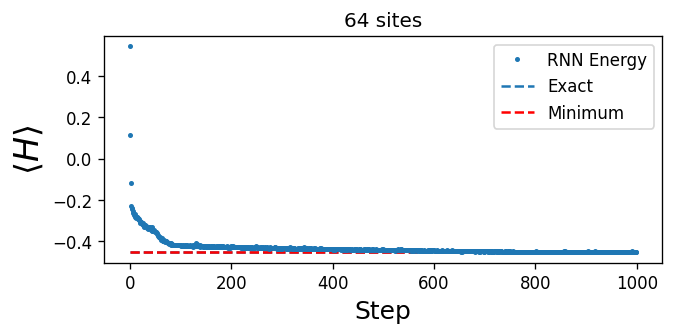

Final Energy -0.4519658188025157 (Exact Energy is -0.4534132086591546)
Final Error after 1000 epochs is 0.001447389856638892
The lowest energy achieved by the model was -0.4549492299556732.


-0.4519658188025157

In [42]:
plot_E(e_old,exact_E,64,len(e_old))

### New 1D RNN (to check that training is consistent still)

In [51]:
def main():
    config = {
        'name': 'batch_samples_new1drnn', # A name for each experiment
        'Lx': 4,  # number of sites in x-direction                    
        'Ly': 4,  # number of sites in the y-direction
        'V': 7.,
        'Omega': 1.,
        'delta': 1.,
        'sweep_rate':15,
        
        'nh': 32,  # number of memory/hidden units
        'lr': 1e-3,  # learning rate
        'weight_sharing': True,
        'trunc': 100,
        'seed': 1234,
        
        'RNN': 'OneD',
        'version':'New',
        'MDGRU': True,
        'VMC_epochs':1000,
        'Data_epochs':0,
        
        'ns': 1000,
        'batch_samples':True,
        'batch_size': 1000,
        
        'Print':True,
        'Write_Data': True,
        'CKPT':False,
        'Plot': True
        }
    
    return Train_w_VMC(config)


if __name__ == "__main__":
    model_old,e_old,v_old,c_old = main()

Training a one-D RNN wave function with 32 hidden units and shared weights.
OneD RNN adapted from Heisenberg-Kagome project.
gru_16/gru_cell_16/kernel:0 (192,)
gru_16/gru_cell_16/recurrent_kernel:0 (3072,)
gru_16/gru_cell_16/bias:0 (192,)
RNNWF_dense_0/kernel:0 (64,)
RNNWF_dense_0/bias:0 (2,)
The sum of params is 3522
The experimental parameters are: V = 7.0, delta = 1.0, Omega = 1.0.
The system is an array of 4 by 4 Rydberg Atoms.
getting energy function!
CKPT OFF. Initializing from scratch.
Tracing!
Tracing!
Step #50
Energy = -0.22474130988121033
Variance = 1.1047730445861816
 
Saved training quantitites for step 50 in ./data/N_16/delta_1.0/OneD_rnn/batch_samples_new1drnn.


KeyboardInterrupt: 

# Data Training

### Old 1D RNN

In [7]:
def main():
    config = {
        'name': 'Benchmark_Data_OneD_old', # A name for each experiment
        'Lx': 4,  # number of sites in x-direction                    
        'Ly': 4,  # number of sites in the y-direction
        'V': 7.,
        'Omega': 1.,
        'delta': 1.,
        'sweep_rate':15,
        
        'nh': 32,  # number of memory/hidden units
        'lr': 1e-3,  # learning rate
        'weight_sharing': True,
        'trunc': 100,
        'seed': 1234,
        
        'RNN': 'OneD',
        'version':'Old',
        'MDGRU': True,
        'VMC_epochs':0,
        'Data_epochs':500,
        
        'ns': 1000,
        'batch_samples':False,
        'batch_size_samples': 100,
        'batch_size_data':100,
        
        'Print':True,
        'Write_Data': True,
        'CKPT':False,
        'Plot': True
        }
    
    return Train_w_Data(config)


if __name__ == "__main__":
    model_old,e_old,v_old,c_old = main()

Not batching samples drawn from RNN, meaning batch size = 1000
Training a one-D RNN wave function with 32 hidden units and shared weights.
OneD RNN used in previous Rydberg project.
gru_1/gru_cell_1/kernel:0 (192,)
gru_1/gru_cell_1/recurrent_kernel:0 (3072,)
gru_1/gru_cell_1/bias:0 (192,)
dense_1/kernel:0 (64,)
dense_1/bias:0 (2,)
The sum of params is 3522
The experimental parameters are: V = 7.0, delta = 1.0, Omega = 1.0.
The system is an array of 4 by 4 Rydberg Atoms
getting energy function!
CKPT OFF. Initializing from scratch.
Tracing!
Tracing!


KeyboardInterrupt: 